<a href="https://colab.research.google.com/github/aevans32/ProyectoFinal_PacificoBusinessSchool_RenewalRates/blob/main/ProyectoFinal_CasoEstudioN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#########################################################################################
#########------- Machine Learning para la Toma de Decisiones ------------################
#########################################################################################
# Autor: Andres Evans
# Tema: Caso de Estudio N.03 - Renewal Rates for Insurance a Company
#########################################################################################

In [ ]:
# %matplotlib inline is a magic command used in Jupyter Notebooks to ensure that matplotlib plots are displayed directly below the code cell that produces them, and not in a separate window.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura de datos
df_raw = pd.read_csv('InsuranceCompany.csv')

Identificamos el largo y ancho de la data.

In [ ]:
df_raw.shape

(79853, 13)

In [ ]:
# Definicion de las columnas y descripciones
variable_descriptions = {
    'id': 'Cliente ID',
    'perc_premium_paid_by_cash_credit': 'Porcentaje del monto de la prima pagado en efectivo o con tarjeta de crédito',
    'age_in_days': 'Edad del cliente en días',
    'Income': 'Ingresos del cliente',
    'Count_3-6_months_late': 'N° de primas atrasadas de 3 a 6 meses',
    'Count_6-12_months_late': 'N° de primas atrasadas de 6 a 12 meses',
    'Count_more_than_12_months_late': 'N° de primas atrasadas por más de 12 meses',
    'application_underwriting_score': 'Puntuación de suscripción del solicitante en el momento de la solicitud',
    'no_of_premiums_paid': 'Total de primas pagadas a tiempo hasta ahora',
    'sourcing_channel': 'Canal de abastecimiento para aplicación',
    'residence_area_type': 'Área de residencia',
    'premium': 'Monto de la prima del seguro mensual',
    'renewal': '¿Póliza renovada? (0 = No Renovado, 1 = Renovado)'
}

# Crear el DataFrame
descripcion_df = pd.DataFrame(list(variable_descriptions.items()), columns=['Variable', 'Descripción'])

# Mostrar la tabla
descripcion_df

,Variable,Descripción
0,id,Cliente ID
1,perc_premium_paid_by_cash_credit,Porcentaje del monto de la prima pagado en efe...
2,age_in_days,Edad del cliente en días
3,Income,Ingresos del cliente
4,Count_3-6_months_late,N° de primas atrasadas de 3 a 6 meses
5,Count_6-12_months_late,N° de primas atrasadas de 6 a 12 meses
6,Count_more_than_12_months_late,N° de primas atrasadas por más de 12 meses
7,application_underwriting_score,Puntuación de suscripción del solicitante en e...
8,no_of_premiums_paid,Total de primas pagadas a tiempo hasta ahora
9,sourcing_channel,Canal de abastecimiento para aplicación


---
##**1.- Identificar el problema de la naturaleza o del negocio que tiene la empresa, asociado a la necesidad o la razón de su situación actual.**

**Naturaleza del Negocio**

La empresa pertenece al sector de seguros, y su modelo de ingresos depende directamente de:

* La emisión y renovación de pólizas de seguro.
* La recolección efectiva de primas (pagos mensuales de los asegurados).
* El esfuerzo de sus agentes comerciales para lograr renovaciones.

**Situación actual**

Según la descripción del caso:

* Se cuenta con información de transacciones históricas, demografía del cliente, canal de adquisición, historial de pago, y comportamiento de renovación.

* La empresa enfrenta una tasa de renovación que podría mejorar, y desea utilizar los datos históricos para anticiparse a posibles no renovaciones.

**Necesidad del negocio**

La empresa quiere predecir la propensión de renovación de cada cliente con el objetivo de:

1.   Maximizar los ingresos netos provenientes de renovaciones.
2.   Optimizar los incentivos que otorga a los agentes, asignando esfuerzo de manera estratégica.
3.   Reducir el churn (deserción) de clientes y mejorar la retención.

**Problema central**

La empresa no sabe qué clientes tienen mayor riesgo de no renovar su póliza ni cómo priorizar los esfuerzos de sus agentes para mejorar las tasas de renovación. Esto limita su capacidad de planificar campañas de retención efectivas y optimizar los costos en incentivos.

---
##**2.- Definir los objetivos de negocio que van a dar solución a la situación actual o van a ser un paliativo a su problema de negocio**

Dado que el problema de negocio se basa en predecir renovaciones y optimizar los recursos de los agentes comerciales, los objetivos de negocio deben estar orientados a:

**1. Predecir la propensión a renovar**

* Utilizar los datos históricos de clientes y transacciones para construir un modelo que estime la probabilidad de renovación de cada póliza.
* Este modelo permitirá identificar clientes con alto riesgo de no renovar antes de que lo hagan.

**2. Diseñar un plan de incentivos inteligente para los agentes**

* Asignar esfuerzos (tiempo y atención) de los agentes a aquellos clientes donde su intervención tenga un mayor impacto en aumentar la probabilidad de renovación.
* Minimizar el gasto innecesario en incentivos a clientes que probablemente renovarán sin intervención o no renovarán incluso con intervención.

**3. Maximizar ingresos netos por pólizas renovadas**

* Al enfocar recursos en los clientes correctos, se busca maximizar la tasa de renovación y, por tanto, aumentar los ingresos por primas cobradas, descontando el costo de los incentivos.

**4. Mejorar la eficiencia operativa del equipo comercial**

* Usar el modelo para ayudar a los equipos comerciales a priorizar llamadas, visitas o acciones según el riesgo de cancelación y el impacto potencial de su esfuerzo.

**Estrategia basada en analítica:**

Transformar un proceso tradicionalmente reactivo (esperar que el cliente renueve o no) en uno proactivo y dirigido por datos, donde las decisiones se toman con base en modelos predictivos y simulaciones de impacto.

---
###**3.- Los objetivos antes identificados los puede solucionar mediante un producto analítico basado en aprendizaje supervisado o aprendizaje no supervisado. Justifique su respuesta.**

###Tipo de aprendizaje: Aprendizaje Supervisado

1. Tenemos una variable objetivo claramente definida
* La variable renewal indica si una póliza fue renovada (1) o no renovada (0).
* Esto convierte al problema en uno de clasificación binaria, típico del aprendizaje supervisado.

2. Contamos con ejemplos históricos etiquetados
* El dataset contiene múltiples variables de entrada (features) como edad, ingresos, número de primas pagadas o atrasadas, canal, etc., y una etiqueta histórica **(renewal)** que indica el resultado real.
* Esto permite entrenar un modelo supervisado para aprender la relación entre las características y la probabilidad de renovación.

3. Queremos hacer predicciones sobre casos nuevos
* El objetivo es predecir, con base en nuevas entradas (clientes actuales), si van a renovar o no su póliza. Esto solo puede lograrse si el modelo ha sido entrenado en un conjunto donde la respuesta es conocida.


\

**¿Y por qué no aprendizaje no supervisado?**

El aprendizaje no supervisado se usa cuando:

* No tenemos etiquetas (como “renovó” o “no renovó”).
* Queremos encontrar agrupamientos naturales o patrones ocultos (por ejemplo, segmentación de clientes por comportamiento sin saber el resultado).

Aunque el análisis no supervisado podría usarse como complemento para segmentar clientes o entender perfiles de riesgo, no es útil para resolver directamente el objetivo principal del negocio, que es predecir si renovarán o no.

---
##**4.- ¿Qué tipo de variables se utilizan en el problema de negocio? Es decir que dominios identifica. Ejemplo: Dominio sociodemográfico, dominio de facturación, dominio de reclamos.**

1. Dominio sociodemográfico (cliente)
Estas variables describen características personales del asegurado:

In [ ]:
variables_sociodemograficas = ['age_in_days', 'Income', 'residence_area_type']
descripcion_df[descripcion_df['Variable'].isin(variables_sociodemograficas)]

,Variable,Descripción
2,age_in_days,Edad del cliente en días
3,Income,Ingresos del cliente
10,residence_area_type,Área de residencia


2. Dominio transaccional o de comportamiento
Se refiere al historial de pagos y comportamiento financiero del asegurado:

In [ ]:
variables_transaccionales = ['no_of_premiums_paid', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'perc_premium_paid_by_cash_credit', 'premium']
descripcion_df[descripcion_df['Variable'].isin(variables_transaccionales)]

,Variable,Descripción
1,perc_premium_paid_by_cash_credit,Porcentaje del monto de la prima pagado en efe...
4,Count_3-6_months_late,N° de primas atrasadas de 3 a 6 meses
5,Count_6-12_months_late,N° de primas atrasadas de 6 a 12 meses
6,Count_more_than_12_months_late,N° de primas atrasadas por más de 12 meses
8,no_of_premiums_paid,Total de primas pagadas a tiempo hasta ahora
11,premium,Monto de la prima del seguro mensual



3. Dominio de riesgo / perfil técnico
Refleja el perfil técnico del cliente al momento de su evaluación para suscripción:

In [ ]:
variables_riesgo = ['application_underwriting_score']
descripcion_df[descripcion_df['Variable'].isin(variables_riesgo)]

,Variable,Descripción
7,application_underwriting_score,Puntuación de suscripción del solicitante en e...


4. Dominio comercial / canal de adquisición
Variables asociadas al proceso comercial o canal de venta:

In [ ]:
variables_comerciales = ['sourcing_channel']
descripcion_df[descripcion_df['Variable'].isin(variables_comerciales)]

,Variable,Descripción
9,sourcing_channel,Canal de abastecimiento para aplicación


5. Dominio de resultado / objetivo
Variable objetivo que queremos predecir:

In [ ]:
variables_resultado = ['renewal']
descripcion_df[descripcion_df['Variable'].isin(variables_resultado)]

,Variable,Descripción
12,renewal,"¿Póliza renovada? (0 = No Renovado, 1 = Renovado)"


---
##**5.- De las variables entregadas en la BBDD, identifique:**
* La variable objetivo, respuesta o **target**. (renewal)
* Las variables independientes o **drivers**. (todas las demas)

---
##**6.- Construya mediante las distintas técnicas de ingeniería de variables, nuevas características que les permitan tener mejores relaciones o mayor explicabilidad con la variable objetivo.**

Primero vamos a analizar nuevamente un sample de 5 filas del data frame original.

In [ ]:
df_raw.sample(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
55260,63845,0.194,17899,49820,0.0,0.0,0.0,98.03,10,A,Urban,3300,1
9949,107500,0.043,24826,76530,0.0,0.0,0.0,99.88,6,A,Urban,5400,1
9529,48044,0.841,10963,150100,0.0,0.0,0.0,99.31,13,A,Urban,5400,1
72103,35812,0.038,18622,508150,0.0,0.0,0.0,99.24,13,D,Rural,57900,1
40472,70404,0.269,21914,480030,0.0,0.0,0.0,99.86,11,A,Urban,26400,1


Ahora veamos el largo y ancho de nuestro data frame.

In [ ]:
df_raw.shape

(79853, 13)

Veamos también el tipo de variables contenidas en cada columna.

Podemos ver que todas las columnas contienen valores numéricos, con excepción de 'sourcing_channel' y 'residence_area_type'.

In [ ]:
df_raw.dtypes

,0
id,int64
perc_premium_paid_by_cash_credit,float64
age_in_days,int64
Income,int64
Count_3-6_months_late,float64
Count_6-12_months_late,float64
Count_more_than_12_months_late,float64
application_underwriting_score,float64
no_of_premiums_paid,int64
sourcing_channel,object


Contamos las repeticiones de cada tipo de data cell en la columna 'sourcing_channel' para verificar que no tenemos data anomala.

Podemos ver en el resultado que solo tenemos 5 tipos de variables que no muestran anomalías.

In [ ]:
df_raw['sourcing_channel'].value_counts()

,count
sourcing_channel,
A,43134
B,16512
C,12039
D,7559
E,609


Obtenemos el mismo tipo de resultado positivo en la columna 'residence_area_type'

In [ ]:
df_raw['residence_area_type'].value_counts()

,count
residence_area_type,
Urban,48183
Rural,31670


Ahora vamos a encadenar los metodos isnull() + sum() para detectar celdas nulas en el data frame.

In [ ]:
df_raw.isnull().sum()

,0
id,0
perc_premium_paid_by_cash_credit,0
age_in_days,0
Income,0
Count_3-6_months_late,97
Count_6-12_months_late,97
Count_more_than_12_months_late,97
application_underwriting_score,2974
no_of_premiums_paid,0
sourcing_channel,0


Hemos encontrado varias celdas nulas. Si consideramos la longitud del data frame siendo:

In [ ]:
len(df_raw)

79853

Podemos decir que las 3 columnas con data de pagos atrasados y la columna de score hacen los siguientes porcentajes de la data total:

In [ ]:
# Porcentaje de nulos por columna
null_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100

# Mostrar solo columnas con algun valor nulo
null_percentage[null_percentage > 0].sort_values(ascending=False).map(lambda x: f'{x:.2f}%')

,0
application_underwriting_score,3.72%
Count_3-6_months_late,0.12%
Count_6-12_months_late,0.12%
Count_more_than_12_months_late,0.12%


Al ser los porcentajes relativamente bajos, podemos tomar la salida facil y eliminar estas filas de esta manera:

In [ ]:
# Puedes tomar el camino facil y deshacerte de los nulos con:
# df_raw_noNull = df_raw.dropna()

Pero tambien podemos tratar de imputar los resultados encontrando alguna logica oculta.

Primero analicemos por que la data de pagos tardios es null obteniendo samples de cada columna.

In [ ]:
df_raw[df_raw['Count_3-6_months_late'].isnull()].sample(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
77321,101186,1.0,17897,62610,NaN,NaN,NaN,NaN,2,B,Urban,3300,1
10464,84203,1.0,19724,60100,NaN,NaN,NaN,99.87,2,A,Urban,5400,0
43922,50034,1.0,21185,75130,NaN,NaN,NaN,NaN,2,A,Urban,5700,0
45213,7743,1.0,10227,37410,NaN,NaN,NaN,99.82,2,A,Rural,5700,0
45071,68733,1.0,9498,69240,NaN,NaN,NaN,NaN,2,A,Rural,1200,1


In [ ]:
df_raw[df_raw['Count_6-12_months_late'].isnull()].sample(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
62762,31126,1.0,15341,96110,NaN,NaN,NaN,NaN,2,B,Urban,5400,0
75360,66964,1.0,21545,65530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
51512,91238,1.0,18992,90070,NaN,NaN,NaN,NaN,2,A,Urban,3300,1
77321,101186,1.0,17897,62610,NaN,NaN,NaN,NaN,2,B,Urban,3300,1
11358,25729,1.0,9133,119790,NaN,NaN,NaN,NaN,2,C,Urban,5400,0


In [ ]:
df_raw[df_raw['Count_more_than_12_months_late'].isnull()].sample(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
4177,19184,1.0,18260,40530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
28330,112528,1.0,9868,90120,NaN,NaN,NaN,NaN,2,A,Urban,3300,1
13639,79385,1.0,9498,60130,NaN,NaN,NaN,NaN,2,A,Urban,7500,1
64465,80463,1.0,10592,55690,NaN,NaN,NaN,NaN,2,A,Urban,3300,1
64950,15406,1.0,8400,65130,NaN,NaN,NaN,99.88,2,A,Rural,1200,0


Podemos ver que cuando un dato de pagos tardios es null, los demas que muestran otros meses tambien lo son. Probablemente sugiriendo de que para estos registros no hubieron pagos nulos ya que el pago se dio a tiempo antes de los 3 meses.

En los siguientes dos calculos tratamos de buscar una correlacion visual entre el score y el sourcing_channel con un sample para cada tipo de sourcing_channel cuando el score es null.

In [ ]:
missing_score_rows = df_raw[(df_raw['application_underwriting_score'].isnull()) & (df_raw['sourcing_channel'] == 'A')]
missing_score_rows.sample(n=5, random_state=42)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
73980,88613,0.000,9865,174080,0.0,0.0,0.0,NaN,5,A,Urban,7500,1
38755,90525,0.054,10227,114030,0.0,0.0,0.0,NaN,4,A,Rural,7500,1
51861,62461,0.010,23365,103350,0.0,0.0,0.0,NaN,5,A,Urban,5400,1
14954,102402,0.139,31030,519130,1.0,0.0,0.0,NaN,29,A,Rural,24300,1
33331,109421,0.000,26286,139770,0.0,0.0,0.0,NaN,6,A,Rural,9600,1


In [ ]:
missing_score_rows = df_raw[(df_raw['application_underwriting_score'].isnull()) & (df_raw['sourcing_channel'] == 'B')]
missing_score_rows.sample(n=5, random_state=42)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
71701,62771,0.002,21910,174090,0.0,0.0,0.0,NaN,9,B,Urban,1200,1
14281,43324,1.000,11326,192610,0.0,1.0,0.0,NaN,3,B,Urban,11700,1
51121,17253,1.000,19354,111050,0.0,0.0,0.0,NaN,3,B,Rural,3300,1
55309,80500,0.885,17526,63100,1.0,0.0,0.0,NaN,7,B,Rural,5400,1
59034,76246,1.000,14613,153070,0.0,0.0,0.0,NaN,2,B,Urban,7500,0


Sin embargo esto no dio resultados importantes.

En su lugar, vamos a ver los primeros y ultimos valores de datos no nulos en la columna de score:

In [ ]:
df_raw[['application_underwriting_score']].sort_values(by='application_underwriting_score').dropna()

,application_underwriting_score
51800,91.90
60239,91.96
29399,91.96
34673,91.96
6784,91.98
...,...
15404,99.89
15423,99.89
52719,99.89
52688,99.89


Podemos ver que los datos de score van desde el 91.90 hasta el 99.89; por lo que vamos a realizar un grafico de distribuicion normal para visualizarlo mejor.

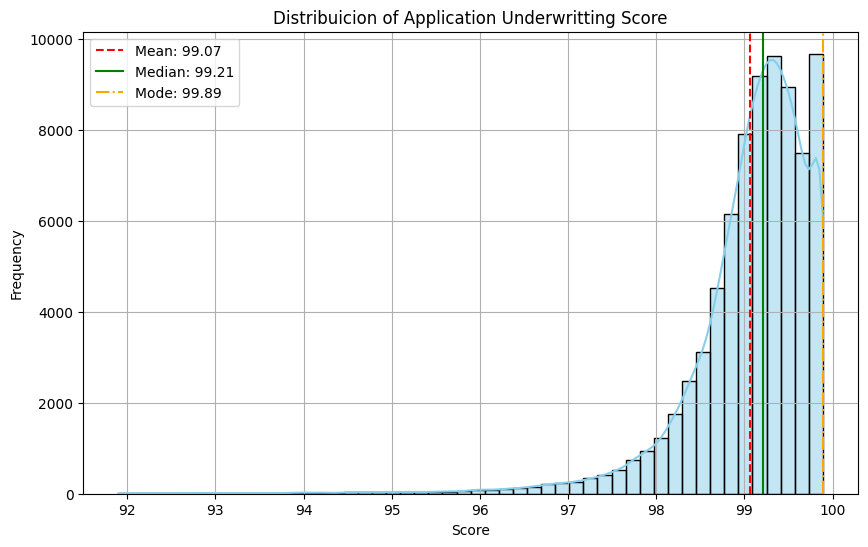

In [ ]:
# non null values only
score_data = df_raw['application_underwriting_score'].dropna()

# Calculate stats
mean_val = score_data.mean()
median_val = score_data.median()
mode_val = score_data.mode().iloc[0] # .mode() returns a Series

# plot histogram + kernel density estimate
plt.figure(figsize=(10,6))
sns.histplot(score_data, bins=50, kde=True, color='skyblue')

# Add vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='orange', linestyle='-.', label=f'Mode: {mode_val:.2f}')

plt.title('Distribuicion of Application Underwritting Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

El grafico de la distribuicion nos muestra una forma right-skewed en la cual el mean y median no estan alineados, y el mode se encuentra al extremo derecho.

Para obtener deducciones tenemos que analizar la explicacion provista de la data:

In [ ]:
descripcion_df

,Variable,Descripción
0,id,Cliente ID
1,perc_premium_paid_by_cash_credit,Porcentaje del monto de la prima pagado en efe...
2,age_in_days,Edad del cliente en días
3,Income,Ingresos del cliente
4,Count_3-6_months_late,N° de primas atrasadas de 3 a 6 meses
5,Count_6-12_months_late,N° de primas atrasadas de 6 a 12 meses
6,Count_more_than_12_months_late,N° de primas atrasadas por más de 12 meses
7,application_underwriting_score,Puntuación de suscripción del solicitante en e...
8,no_of_premiums_paid,Total de primas pagadas a tiempo hasta ahora
9,sourcing_channel,Canal de abastecimiento para aplicación


Podemos deducir que las columnas de pagos atrasados, si estan en null, es porque el pago fue realizado temprano, asi que podemos llenarlas con valores 0.

Adicionalmente, podemos llenar los datos de score con el valor median, ya que es el mas centrado de las 3 metricas que usamos.

In [ ]:
# Creamos una copia de la data original en una variable que represente una data sin Nulls
df_noNull = df_raw.copy()

# llenamos las columnas de pagos de primas por meses atrasados a 0.0 asumiendo que son casos sin pagos atrasados
df_noNull[['Count_3-6_months_late',
           'Count_6-12_months_late',
           'Count_more_than_12_months_late']] = df_noNull[[
               'Count_3-6_months_late',
               'Count_6-12_months_late',
               'Count_more_than_12_months_late'
           ]].fillna(0.0)

# Calcular el median para los casos con score en null
median_score = df_raw['application_underwriting_score'].median()

# llenamos las columnas de score con el dato median
df_noNull['application_underwriting_score'] = df_noNull['application_underwriting_score'].fillna(median_score)

Ahora analicemos si tenemos algun valor null en nuestro nuevo data frame:

In [ ]:
df_noNull.isnull().sum()

,0
id,0
perc_premium_paid_by_cash_credit,0
age_in_days,0
Income,0
Count_3-6_months_late,0
Count_6-12_months_late,0
Count_more_than_12_months_late,0
application_underwriting_score,0
no_of_premiums_paid,0
sourcing_channel,0


Ya que no tenemos ningun valor null, realicemos el grafico de distribuicion nuevamente para ver si nuestra data ha cambiado significativamente.

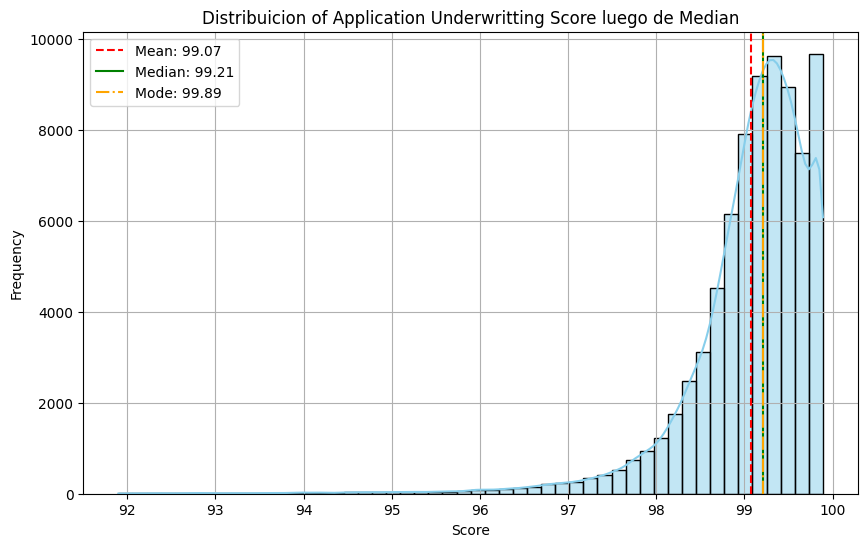

In [ ]:
# non null values only
score_data2 = df_noNull['application_underwriting_score']

# Calculate stats
mean_val2 = score_data2.mean()
median_val2 = score_data2.median()
mode_val2 = score_data2.mode().iloc[0] # .mode() returns a Series

# plot histogram + kernel density estimate
plt.figure(figsize=(10,6))
sns.histplot(score_data, bins=50, kde=True, color='skyblue')

# Add vertical lines
plt.axvline(mean_val2, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val2, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val2, color='orange', linestyle='-.', label=f'Mode: {mode_val:.2f}')

plt.title('Distribuicion of Application Underwritting Score luego de Median')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que nuestra distribuicion sigue altamente similar, right-skewed, con el mismo Mean, y mismo Median. La unica diferencia es que ahora el mode, valor mas repetido es tambien el Median. Pero esto no deberia afectar a nuestros calculos.

Importamos algunas librerias para el procesamiento necesario.

In [ ]:
# Importando librerias necesarias
import pandas as pd                                   # Procesamiento de tablas como data frames.
from sklearn.linear_model import LogisticRegression   # Modelo de regresion logistica
from sklearn.model_selection import train_test_split  # Metodo de division de data para train y test.
from sklearn.preprocessing import StandardScaler      # Escalador modifica la data para una base numerica mas semejante.
import matplotlib.pyplot as plt                       # Graficar y plotear.
import seaborn as sns                                 # Modelos estatisticos graficos.

Hacemos una copia de seguridad para no transformar la data original de manera destructiva.

In [ ]:
df_noNull.sample(3)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
77899,12066,0.000,21540,84270,0.0,0.0,0.0,99.09,9,A,Rural,5400,1
61297,93818,0.369,18261,117110,1.0,0.0,0.0,98.43,12,B,Urban,3300,1
59544,89264,0.093,19352,183040,0.0,0.0,0.0,99.14,13,A,Urban,13800,1


In [ ]:
# Copiar el dataframe de trabajo
df = df_noNull.copy()

Agregamos nuevos ratios:

---

## *Ratios Financieros*

**1. premium_to_income_ratio**

Fórmula: **premium / Income**

Función: Mide qué proporción de los ingresos mensuales del cliente representa la prima del seguro.

* Bajo ratio: la prima es asequible → mayor probabilidad de renovación.

* Alto ratio: la prima consume una parte grande del ingreso → mayor riesgo de no renovar.

In [ ]:
df['premium_to_income_ratio'] = df['premium'] / df['Income']

In [ ]:
df['premium_to_income_ratio'].sample(3)

,premium_to_income_ratio
17296,0.028457
15638,0.091180
20111,0.054463


**2. annual_premium**

Fórmula: **premium * 12**

Función: Calcula el costo anual del seguro. Útil para interpretar el impacto financiero total y cruzarlo con ingresos o score.

* Ayuda a comparar clientes con diferentes valores de prima mensual.

In [ ]:
df['annual_premium'] = df['premium'] * 12

In [ ]:
df['annual_premium'].sample(3)

,annual_premium
77393,64800
12814,266400
65342,165600


**3. annual_premium_to_income_ratio**

Fórmula: **(premium * 12) / (Income * 12)**

Función: Proporción del ingreso anual destinada a pagar la prima anual.

* Más intuitivo que el ratio mensual en mercados donde las decisiones se toman por presupuestos anuales.

In [ ]:
df['annual_premium_to_income_ratio'] = df['annual_premium'] / (df['Income'] * 12)

In [ ]:
df['annual_premium_to_income_ratio'].sample(3)

,annual_premium_to_income_ratio
61217,0.048563
28918,0.063970
12605,0.053769


---

## *Historial de Mora*

**4. total_late_payments**

Fórmula: **Count_3-6_months_late + Count_6-12_months_late + Count_more_than_12_months_late**

Función: Número total de primas atrasadas, sin importar el tiempo de atraso.

* Un indicador general de comportamiento de pago.

In [ ]:
df['total_late_payments'] = (df['Count_3-6_months_late'] + df['Count_6-12_months_late'] + df['Count_more_than_12_months_late'])

Estas son las sumas de todos los meses de atraso.

In [ ]:
df['total_late_payments'].value_counts()

,count
total_late_payments,
0.0,63645
1.0,9597
2.0,3201
3.0,1484
4.0,802
5.0,468
6.0,283
7.0,162
8.0,90


Este es el cliente con más meses de atraso.

In [ ]:
df[df['total_late_payments'] == 19.0]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,premium_to_income_ratio,annual_premium,annual_premium_to_income_ratio,total_late_payments
43092,107733,0.47,21545,477570,5.0,6.0,8.0,96.95,36,A,Rural,11700,1,0.024499,140400,0.024499,19.0


In [ ]:
df_raw.sample(3)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
45004,95315,0.635,10598,135080,0.0,0.0,0.0,99.32,5,C,Rural,1200,1
67999,110792,0.002,9864,90080,0.0,0.0,0.0,99.57,5,A,Urban,7500,1
12329,91639,0.298,13517,197290,0.0,0.0,0.0,99.46,11,D,Urban,7500,1


**5. late_payment_ratio**

Fórmula: **total_late_payments / no_of_premiums_paid**

Función: Proporción de pagos atrasados frente al total pagado.

* Un cliente que pagó 20 veces pero se atrasó 5 tiene peor ratio que uno que se atrasó 1 vez de 20.

In [ ]:
df['late_payment_ratio'] = (df['total_late_payments'] / df['no_of_premiums_paid'].replace(0, np.nan)).fillna(0)

In [ ]:
df['late_payment_ratio'].sample(3)

,late_payment_ratio
39191,0.000
45500,0.125
70927,0.000


Este es el cliente con el ratio más alto de meses de atraso.

In [ ]:
df['late_payment_ratio'].max()

6.5

Aquí vemos la cantidad de primas pagadas por el cliente, la cantidad total de primas atrasadas y su ratio de atrasos.

In [ ]:
df.loc[df['late_payment_ratio'] == 6.5, ['no_of_premiums_paid','total_late_payments','late_payment_ratio']]

,no_of_premiums_paid,total_late_payments,late_payment_ratio
64797,2,13.0,6.5


A comparación, el cliente con más pagos atrasados no tiene el ratio más alto de pagos atrasados debido a que ha pagado más primas en total.

In [ ]:
df.loc[df['id'] == 107733, ['no_of_premiums_paid','total_late_payments','late_payment_ratio']]

,no_of_premiums_paid,total_late_payments,late_payment_ratio
43092,36,19.0,0.527778


**6. severity_late_index**

Fórmula: **(3-6m late)\*1 + (6-12m late)\*2 + (>12m late)\*3**

Función: Mide no solo la cantidad de atrasos, sino su gravedad (ponderando más los atrasos largos). No es lo mismo 3 atrasos leves que 1 atraso muy largo. Esta variable pesa más los atrasos severos.

Relación con renovar: −0.36 (negativa y fuerte). Cuanto más “severo” el historial, menos probabilidad de renovar.

* Ayuda a diferenciar entre moras leves y severas.

In [ ]:
df['severity_late_index'] = (1*df['Count_3-6_months_late'] + 2*df['Count_6-12_months_late'] + 3*df['Count_more_than_12_months_late'])

In [ ]:
df['severity_late_index'].value_counts().sort_index()

,count
severity_late_index,
0.0,63645
1.0,7220
2.0,2900
3.0,2195
4.0,1084
5.0,691
6.0,561
7.0,409
8.0,254


**7. arrears_6m_plus_flag**

Fórmula: **1 si hubo algún atraso >6 meses, else 0**

Función: Bandera binaria para detectar clientes con historial de mora significativa.

In [ ]:
df['arrears_6m_plus_flag'] = ((df['Count_6-12_months_late'] + df['Count_more_than_12_months_late']) > 0).astype(int)

In [ ]:
df['arrears_6m_plus_flag'].sample(3)

,arrears_6m_plus_flag
69330,1
27228,0
1401,0


---

## *Parámetros derivados de edad*

**8. age_in_years**

Fórmula: **age_in_days / 365**

Función: Edad del cliente en años, más interpretable que en días.
* Puede correlacionar con estabilidad financiera y lealtad.

In [ ]:
df['age_in_years'] = df['age_in_days'] / 365.0

In [ ]:
df['age_in_years'].sample(3)

,age_in_years
78143,76.038356
10811,43.027397
57075,48.038356


**9. age_bucket**

Fórmula: **Segmentos <25, 25-35, 35-50, >50**

Función: Categoriza la edad en rangos para detectar patrones demográficos.

In [ ]:
df['age_bucket'] = pd.cut(
    df['age_in_years'],
    bins=[0,25,35,50,120],
    labels=['<25','25-35','35-50','>50']
)

In [ ]:
df['age_bucket'].sample(3)

,age_bucket
57686,35-50
13714,35-50
74519,>50


---

## *Indicadores Binarios*

**10. high_underwriting_score_flag**

Fórmula: **High, Medium o Low si application_underwriting_score esta en bandas de 33%, 66% o hasta 100%**

Función: Identifica clientes con excelente perfil de riesgo según la aseguradora.

Creamos una función con cuantiles para visualizar la distribuición de valores según cuantiles.

In [ ]:
# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

In [ ]:
Cuantiles(df['application_underwriting_score']).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.00,5.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.0,90.00,92.50,95.00,97.50,99.00,100.00
Valor_Cuantil,91.9,96.29,97.84,98.31,98.71,98.93,99.09,99.21,99.32,99.45,99.6,99.78,99.83,99.87,99.88,99.89,99.89


Asignamos valores de score a las 3 categorías.

In [ ]:
q_low  = df['application_underwriting_score'].quantile(0.33)
q_high = df['application_underwriting_score'].quantile(0.66)

df['underwriting_score_band'] = pd.cut(
    df['application_underwriting_score'],
    bins=[-np.inf, q_low, q_high, np.inf],
    labels=['Low','Medium','High']
)

In [ ]:
df['underwriting_score_band'].sample(3)

,underwriting_score_band
11321,Low
43646,Medium
11227,Medium


**11. high_premium_flag**

Fórmula: **1 si premium > mediana**

Función: Marca clientes con primas altas dentro de la cartera.
* Permite segmentar si el valor alto de prima influye en la retención.

In [ ]:
df['high_premium_flag'] = (df['premium'] > df['premium'].median()).astype(int)

In [ ]:
df['high_premium_flag'].sample(3)

,high_premium_flag
75551,1
50605,0
902,1


**12. late_payment_flag**

Fórmula: **1 si total_late_payments > 0**

Función: Bandera simple de si el cliente ha tenido o no algún atraso.

In [ ]:
df['late_payment_flag'] = (df['total_late_payments'] > 0).astype(int)

In [ ]:
df['late_payment_flag'].sample(3)

,late_payment_flag
79212,0
20708,0
16726,0


---

## *Interacciones Útiles*

**13. premium_per_premium_paid**

Fórmula: **premium / no_of_premiums_paid**

Función: Costo promedio por pago realizado.
* Útil para ver si clientes con historial corto están pagando más por prima.

In [ ]:
df['premium_per_premium_paid'] = (
    df['premium'] / df['no_of_premiums_paid'].replace(0, np.nan)
).fillna(df['premium'])

In [ ]:
df['premium_per_premium_paid'].sample(3)

,premium_per_premium_paid
54341,300.0
61972,712.5
44202,1462.5


**14. score_per_income**

Fórmula: **application_underwriting_score / Income**

Función: Relaciona el puntaje de riesgo con la capacidad de pago.
* Un cliente con alto score e ingresos bajos podría comportarse distinto que uno con ingresos altos.

In [ ]:
df['score_per_income'] = df['application_underwriting_score'] / df['Income']

In [ ]:
df['score_per_income'].sample(3)

,score_per_income
13904,0.000119
18517,0.000239
33457,0.000792


---

## *Ratios de pagos*

**15. score_per_income**

Fórmula: **perc_premium_paid_by_cash_credit > 0**

Función: Identifica a los clientes que han pagado al menos una parte de la prima utilizando efectivo o tarjeta de crédito.
* Útil para segmentar a clientes que no usan exclusivamente pagos automáticos/domiciliados.
* Puede reflejar comportamientos más puntuales o irregulares de pago.

In [ ]:
df['cash_credit_flag'] = (df['perc_premium_paid_by_cash_credit'] > 0).astype(int)

In [ ]:
df['cash_credit_flag'].sample(3)

,cash_credit_flag
75760,1
46679,1
39920,1


**17. cash_credit_to_premium_ratio**

Fórmula: **premium * perc_premium_paid_by_cash_credit**

Función: Indica el monto absoluto de la prima pagado en efectivo o tarjeta.

In [ ]:
df['cash_credit_to_premium_ratio'] = (
    df['premium'] * df['perc_premium_paid_by_cash_credit']
)

In [ ]:
df['cash_credit_to_premium_ratio'].sample(3)

,cash_credit_to_premium_ratio
48931,1282.5
77145,244.2
30357,976.8


**18. cash_credit_late_index**

Fórmula: perc_premium_paid_by_cash_credit * total_late_payments

Función: Relaciona el uso de efectivo/tarjeta con el historial de atrasos.

* Puede revelar si ciertos métodos de pago están más asociados con la morosidad.
* Útil para identificar patrones de riesgo en la cartera de clientes.

In [ ]:
df['cash_credit_late_index'] = (df['perc_premium_paid_by_cash_credit'] * df['total_late_payments'])

In [ ]:
df['cash_credit_late_index'].sample(3)

,cash_credit_late_index
61400,0.000
69673,0.000
38382,1.351


---

## *Interacciones compactas*

**19. ratio_x_severity**

Fórmula: **premium_to_income_ratio * (1 + severity_late_index)**

Función: Combina el peso de la prima con la severidad de la mora.
* Resalta casos de clientes con alto ratio y mal historial.

In [ ]:
df['ratio_x_severity'] = df['premium_to_income_ratio'] * (1 + df['severity_late_index'])

In [ ]:
df['ratio_x_severity'].sample(3)

,ratio_x_severity
6534,0.039984
78384,0.086651
13142,0.038372


Nos deshacemos de la columna id que viene con el dataframe para no procesarla en el aprendizaje.

In [ ]:
# Eliminar columnas innecesarias como 'id'
df.drop(columns=['id'], inplace=True)

Con todos los nuevos ratios agregados menos la columna id, tenemos lo siguiente:

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(10)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,premium_to_income_ratio,annual_premium,annual_premium_to_income_ratio,total_late_payments,late_payment_ratio,severity_late_index,arrears_6m_plus_flag,age_in_years,age_bucket,underwriting_score_band,high_premium_flag,late_payment_flag,premium_per_premium_paid,score_per_income,cash_credit_flag,cash_credit_to_premium_ratio,cash_credit_late_index,ratio_x_severity
28648,0.037,10598,67060,0.0,0.0,0.0,99.36,13,A,Urban,5400,1,0.080525,64800,0.080525,0.0,0.000000,0.0,0,29.035616,25-35,Medium,0,0,415.384615,0.001482,1,199.8,0.000,0.080525
66810,0.773,9863,60050,0.0,0.0,0.0,99.00,9,A,Rural,3300,1,0.054954,39600,0.054954,0.0,0.000000,0.0,0,27.021918,25-35,Medium,0,0,366.666667,0.001649,1,2550.9,0.000,0.054954
57121,0.497,27747,186040,0.0,0.0,0.0,99.09,13,A,Urban,9600,1,0.051602,115200,0.051602,0.0,0.000000,0.0,0,76.019178,>50,Medium,1,0,738.461538,0.000533,1,4771.2,0.000,0.051602
70602,0.000,21180,127700,1.0,0.0,0.0,99.72,14,A,Urban,7500,1,0.058731,90000,0.058731,1.0,0.071429,1.0,0,58.027397,>50,High,0,1,535.714286,0.000781,0,0.0,0.000,0.117463
55664,0.044,16432,172660,0.0,0.0,0.0,98.97,15,B,Rural,15900,1,0.092088,190800,0.092088,0.0,0.000000,0.0,0,45.019178,35-50,Low,1,0,1060.000000,0.000573,1,699.6,0.000,0.092088
3074,0.818,12787,147070,1.0,1.0,0.0,99.49,7,D,Rural,11700,0,0.079554,140400,0.079554,2.0,0.285714,3.0,1,35.032877,35-50,High,1,1,1671.428571,0.000676,1,9570.6,1.636,0.318216
45903,0.000,18624,36030,1.0,0.0,0.0,99.23,11,A,Urban,5700,1,0.158201,68400,0.158201,1.0,0.090909,1.0,0,51.024658,>50,Medium,0,1,518.181818,0.002754,0,0.0,0.000,0.316403
42446,0.897,20814,282530,0.0,0.0,0.0,97.79,16,C,Rural,11700,1,0.041412,140400,0.041412,0.0,0.000000,0.0,0,57.024658,>50,Low,1,0,731.250000,0.000346,1,10494.9,0.000,0.041412
35404,0.037,13513,198840,0.0,0.0,0.0,99.21,11,C,Rural,3300,1,0.016596,39600,0.016596,0.0,0.000000,0.0,0,37.021918,35-50,Medium,0,0,300.000000,0.000499,1,122.1,0.000,0.016596
895,0.936,10596,120140,0.0,0.0,0.0,99.82,3,A,Urban,7500,1,0.062427,90000,0.062427,0.0,0.000000,0.0,0,29.030137,25-35,High,0,0,2500.000000,0.000831,1,7020.0,0.000,0.062427


Separamos la columna target 'renewal'.

In [ ]:
# Separar variables drivers y target
X = df.drop(columns='renewal')
y = df['renewal']

In [ ]:
X.sample(3)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,...,age_bucket,underwriting_score_band,high_premium_flag,late_payment_flag,premium_per_premium_paid,score_per_income,cash_credit_flag,cash_credit_to_premium_ratio,cash_credit_late_index,ratio_x_severity
62835,0.676,16430,135140,0.0,0.0,0.0,98.46,18,A,Urban,...,35-50,Low,0,0,416.666667,0.000729,1,5070.0,0.000,0.055498
9898,0.983,20081,120070,1.0,0.0,0.0,97.66,10,B,Urban,...,>50,Low,0,1,540.000000,0.000813,1,5308.2,0.983,0.089948
51960,0.178,21910,149980,0.0,0.0,0.0,97.67,21,B,Rural,...,>50,Low,1,0,557.142857,0.000651,1,2082.6,0.000,0.078010


In [ ]:
y.sample(3)

,renewal
33285,1
63719,1
7755,1


Ahora que nuestra data ya no cuenta con valores null, podemos pasar a realizar diferentes tecnicas de ingenieria de variables como One Hot Encoding y estandarizacion de valores numericos, lo cual realizaremos a continuacion.

Usamos One Hot Encoding para transformar valores categoricos a numéricos y disgregar valores múltiples en una columna.

In [ ]:
# One Hot Encoding de variables categoricas, solo en df X
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)

In [ ]:
X_encoded.sample(3)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,premium_to_income_ratio,...,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban,age_bucket_25-35,age_bucket_35-50,age_bucket_>50,underwriting_score_band_Medium,underwriting_score_band_High
49877,0.026,23375,315040,0.0,0.0,0.0,99.89,3,36900,0.117128,...,0,0,0,0,1,0,0,1,0,1
9058,0.378,20817,105050,0.0,0.0,0.0,99.41,8,1200,0.011423,...,0,0,0,0,1,0,0,1,0,1
36222,0.000,17891,252560,0.0,0.0,0.0,99.09,8,24300,0.096215,...,0,0,0,0,1,0,1,0,1,0


---
##**7.- De los drivers o features seleccionados cuáles de éstos son los más importantes para determinar la probabilidad de renovar el producto.**

Para lograr una seleccion adecuada de las variables driver mas importantes, vamos a usar varios metodos:

###*METODO 1: Regresión Logística para Importancia de Variables*

Usamos Scaling para asemejar variables numéricas.

In [ ]:
# Estandarizar variables numericas, para regresion logistica
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

Ahora mostramos los valores de la primera fila codificados.

In [ ]:
X_scaled[0]

array([ 0.34251415, -1.30334142,  0.29443993, -0.35938304, -0.1790117 ,
       -0.19219945, -0.07242137,  0.41312226, -0.81097826, -1.65550976,
       -0.81097826, -1.65550976, -0.37036361, -0.30889082, -0.32779009,
       -0.29745428, -1.30334142, -0.97458799, -0.50464104, -0.80957993,
       -0.82749932,  0.27785286, -0.35491593, -0.27853108, -0.66037326,
       -0.51057246,  2.37336467, -0.32335609, -0.08766484,  0.81073162,
        2.73736971, -0.70520157, -1.08181852,  1.42321364, -0.70787067])

Aplicamos el modelo de regresión logística con un número máximo de repeticiones a mil para incrementar las probabilidades de un mejor aprendizaje.

In [ ]:
# Entrenar el metodo
# El default max_iter es 100, pero 1000 nos da un mayor techo sin ser excesivo
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

El atributo .coef_ devuelve un array con los atributos valorizados por el modelo de RL. Tambien podemos usar .coef_[0] ya que el array solo tiene un elemento.

In [ ]:
model_LR.coef_

array([[-0.70909262,  0.10589146,  0.02234873, -0.14088365, -0.1189903 ,
        -0.03061237,  0.08952006, -0.21410199,  0.03693769, -0.02441652,
         0.03693769, -0.02441652, -0.15222942, -0.04343245, -0.12891535,
        -0.18158654,  0.10589146,  0.069285  , -0.27594904, -0.10769205,
        -0.03138953,  0.07915401,  0.02117726,  0.25514736,  0.01042987,
        -0.00784262, -0.02902326, -0.05081428, -0.01082277,  0.0063586 ,
         0.0119005 ,  0.00521018,  0.003992  ,  0.10305568,  0.05444811]])

Creamos un nuevo dataframe para guardar los coeficientes de importancia.

In [ ]:
# Importancia de variables (coeficientes)

LR_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,       # Aqui usamos X_encoded solo para obtener los nombres de columnas.
    'Coefficient': model_LR.coef_[0]    # Devuelve los coeficientes aprendidos por la regresión logística.
})

Vemos el nuevo DF con el nombre de la columna y el coeficiente.

In [ ]:
LR_importance_df

,Feature,Coefficient
0,perc_premium_paid_by_cash_credit,-0.709093
1,age_in_days,0.105891
2,Income,0.022349
3,Count_3-6_months_late,-0.140884
4,Count_6-12_months_late,-0.118990
5,Count_more_than_12_months_late,-0.030612
6,application_underwriting_score,0.089520
7,no_of_premiums_paid,-0.214102
8,premium,0.036938
9,premium_to_income_ratio,-0.024417


Ahora agregaremos una nueva columna pero con valores absolutos. Hacemos esto porque nos interesa mas la magnitud de cada variable, en vez de su dirección. Esto es porque por ahora estamos evaluando la importancia de cada variable no su tipo de influencia sobre el parámetro target aún.

In [ ]:
LR_importance_df['Abs_Coefficient'] = LR_importance_df['Coefficient'].abs()             # Calculamos los números absolutos.
LR_importance_df = LR_importance_df.sort_values(by='Abs_Coefficient', ascending=True)   # Los agregamos en una nueva columna.

Ahora graficamos las variables y sus coeficientes calculados por RL en valor absoluto para determinar cuál variable es más importante.

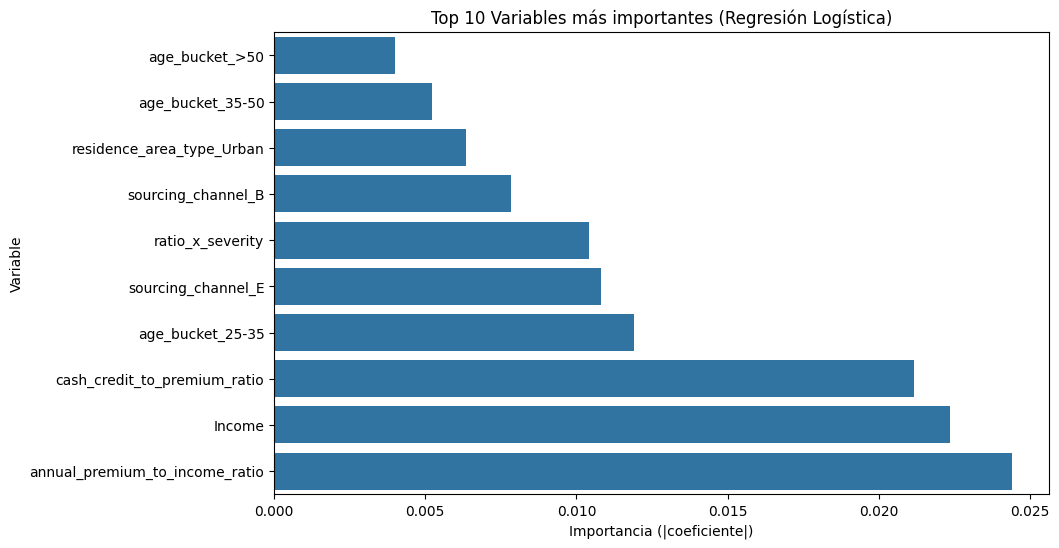

In [ ]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=LR_importance_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title("Top 10 Variables más importantes (Regresión Logística)")
plt.xlabel("Importancia (|coeficiente|)")
plt.ylabel("Variable")
plt.show()

**Observaciones rápidas del gráfico:**

* `age_in_days` es la variable con mayor peso absoluto → la edad del cliente influye fuertemente en la renovación.

* Atrasos largos (`Count_more_than_12_months_late`) penalizan fuertemente la probabilidad de renovar.

* `no_of_premiums_paid` y `application_underwriting_score` también destacan como buenos predictores.

* Algunas variables categóricas como `sourcing_channel_D` tienen cierto impacto, lo cual es interesante para análisis de canales.

###*METODO 2: Random Forest para Importancia de Variables*
Este modelo:

* Pertenece a la familia de bagging (Bootstrap Aggregating), donde se entrenan múltiples árboles de decisión en paralelo usando diferentes muestras aleatorias de los datos y de las variables.

* No requiere escalado previo de los datos.

* Tolera bien outliers, datos ruidosos y colinealidad entre variables.

* Calcula la importancia de variables midiendo cuánto contribuye cada una a reducir la impureza (criterio Gini) en el conjunto de árboles.

* Es capaz de capturar relaciones no lineales y combinaciones de variables que pueden pasar desapercibidas en modelos lineales como la regresión logística.

* El resultado es un ranking de variables ordenadas según su impacto relativo en la predicción, lo que permite priorizar los factores más influyentes sobre la probabilidad de renovación.

Separamos la data encoded en 70% y 30% usando los mismos parámetros pero ahora para obtener objetos dataframe en vez de number array.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

Importamos la libreria RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Entrenamos el modelo Bagging - Random Forests

In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'  # útil si el target está desbalanceado
)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=400,
                       n_jobs=-1, random_state=42)

Gini Importance

In [ ]:
rf_importance_df = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

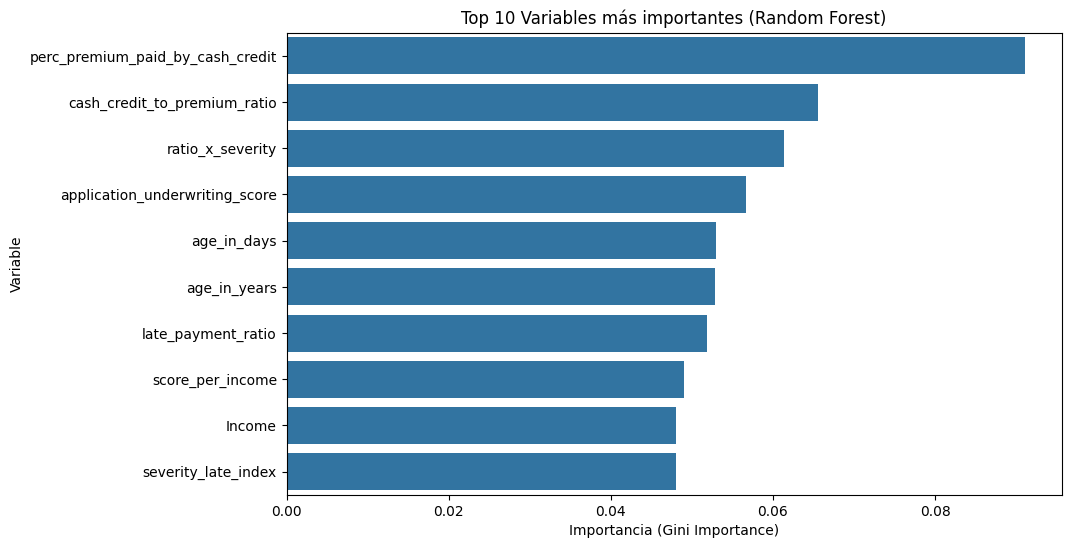

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Variables más importantes (Random Forest)")
plt.xlabel("Importancia (Gini Importance)")
plt.ylabel("Variable")
plt.show()

In [ ]:
! pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
#############################################
# Seleccion Boruta (Permutaciones de arboles)
from boruta import BorutaPy

boruta_selector = BorutaPy(
    rf,
    n_estimators='auto',
    perc = 50,
    alpha = 0.05,
    verbose=2,
    random_state=42)

boruta_selector.fit(X_train_rf,y_train_rf)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	22
Tentative: 	1
Reject

In [ ]:
variables_importantes = X_train_rf.columns[boruta_selector.support_].tolist()

In [ ]:
print(variables_importantes)

['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'premium_to_income_ratio', 'annual_premium', 'annual_premium_to_income_ratio', 'total_late_payments', 'late_payment_ratio', 'severity_late_index', 'arrears_6m_plus_flag', 'age_in_years', 'late_payment_flag', 'premium_per_premium_paid', 'score_per_income', 'cash_credit_to_premium_ratio', 'cash_credit_late_index', 'ratio_x_severity']


/tmp/ipython-input-1393979139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boruta_df, x='Rank', y='Feature', palette='viridis')


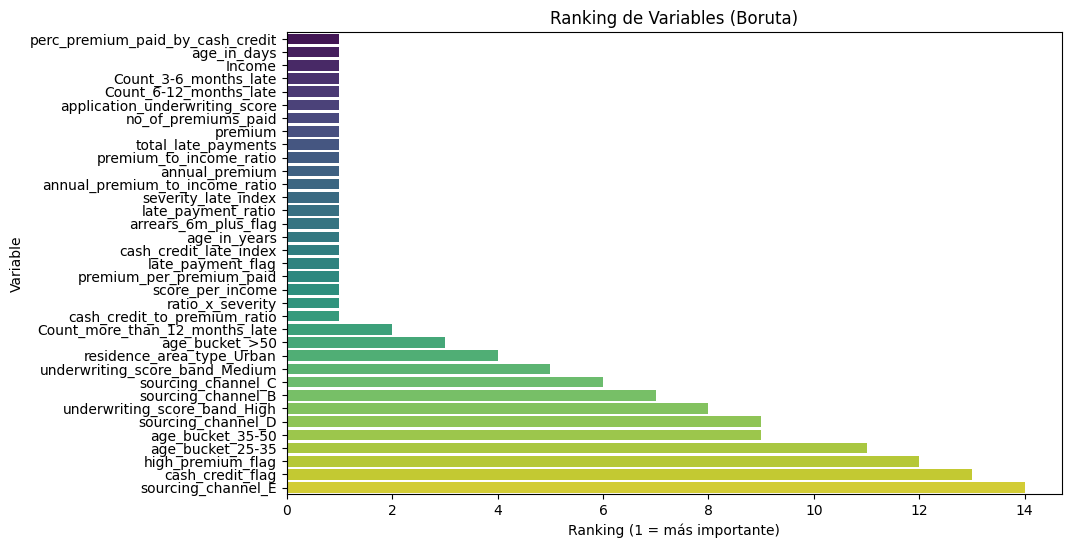

In [ ]:
boruta_df = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Rank': boruta_selector.ranking_
}).sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(data=boruta_df, x='Rank', y='Feature', palette='viridis')
plt.title("Ranking de Variables (Boruta)")
plt.xlabel("Ranking (1 = más importante)")
plt.ylabel("Variable")
plt.show()

In [ ]:
X_train_boruta = X_train_rf[variables_importantes].copy()

In [ ]:
# DF solo con las columnas indicadas por Boruta
X_train_boruta.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,application_underwriting_score,no_of_premiums_paid,premium,premium_to_income_ratio,annual_premium,...,late_payment_ratio,severity_late_index,arrears_6m_plus_flag,age_in_years,late_payment_flag,premium_per_premium_paid,score_per_income,cash_credit_to_premium_ratio,cash_credit_late_index,ratio_x_severity
1562,0.073,18625,138450,0.0,0.0,98.31,9,5400,0.039003,64800,...,0.0,0.0,0,51.027397,0,600.000000,0.000710,394.2,0.0,0.039003
13441,0.000,21540,30900,0.0,0.0,92.82,9,1200,0.038835,14400,...,0.0,0.0,0,59.013699,0,133.333333,0.003004,0.0,0.0,0.038835
52831,0.005,25922,315060,0.0,0.0,99.76,28,24300,0.077128,291600,...,0.0,0.0,0,71.019178,0,867.857143,0.000317,121.5,0.0,0.077128
8261,0.445,15701,150070,0.0,0.0,99.45,14,9600,0.063970,115200,...,0.0,0.0,0,43.016438,0,685.714286,0.000663,4272.0,0.0,0.063970
32638,0.243,18620,525120,0.0,0.0,99.64,11,26400,0.050274,316800,...,0.0,0.0,0,51.013699,0,2400.000000,0.000190,6415.2,0.0,0.050274


In [ ]:
# 1️ Normalizar los rankings para cada método
# Logistic Regression: menor coeficiente absoluto = menos importante
df_lr = LR_importance_df[['Feature', 'Abs_Coefficient']].copy()
df_lr['LR_Rank'] = df_lr['Abs_Coefficient'].rank(ascending=False)

# Random Forest: mayor importancia = más importante
df_rf = rf_importance_df[['Feature', 'Importance']].copy()
df_rf['RF_Rank'] = df_rf['Importance'].rank(ascending=False)

# Boruta: menor Rank = más importante
df_boruta = boruta_df[['Feature', 'Rank']].copy()
df_boruta['Boruta_Rank'] = df_boruta['Rank']  # ya está en formato ranking

# 2️ Unir todo en un solo DataFrame
rank_combined = df_lr.merge(df_rf, on='Feature').merge(df_boruta, on='Feature')

# 3️ Calcular votos (aparece en top N de cada método)
TOP_N = 10
rank_combined['Vote_LR'] = rank_combined['LR_Rank'] <= TOP_N
rank_combined['Vote_RF'] = rank_combined['RF_Rank'] <= TOP_N
rank_combined['Vote_Boruta'] = rank_combined['Boruta_Rank'] <= TOP_N

rank_combined['Votes'] = rank_combined[['Vote_LR','Vote_RF','Vote_Boruta']].sum(axis=1)

# 4️ Calcular ranking promedio
rank_combined['Avg_Rank'] = rank_combined[['LR_Rank','RF_Rank','Boruta_Rank']].mean(axis=1)

# 5️ Elegir variables con al menos 2 votos y ordenadas por ranking promedio
final_features = rank_combined[rank_combined['Votes'] >= 2].sort_values('Avg_Rank')

print("Variables seleccionadas para entrenamiento:")
print(final_features[['Feature','Votes','Avg_Rank']])

# Lista final de nombres
selected_columns = final_features['Feature'].tolist()


Variables seleccionadas para entrenamiento:
                             Feature  Votes   Avg_Rank
34  perc_premium_paid_by_cash_credit      3   1.000000
24                       age_in_days      2   5.666667
32            cash_credit_late_index      2   5.666667
23                      age_in_years      2   6.333333
27               severity_late_index      3   6.333333
21    application_underwriting_score      2   6.333333
33                 late_payment_flag      2   6.666667
31               no_of_premiums_paid      2   6.666667
29               total_late_payments      2   7.666667
30              arrears_6m_plus_flag      2   8.000000
25          premium_per_premium_paid      2   8.333333
16                late_payment_ratio      2   9.000000
28             Count_3-6_months_late      2  10.000000
26            Count_6-12_months_late      2  10.333333
7       cash_credit_to_premium_ratio      2  10.333333
13                  score_per_income      2  10.333333
4                   r

In [ ]:
print(selected_columns)

['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index', 'age_in_years', 'severity_late_index', 'application_underwriting_score', 'late_payment_flag', 'no_of_premiums_paid', 'total_late_payments', 'arrears_6m_plus_flag', 'premium_per_premium_paid', 'late_payment_ratio', 'Count_3-6_months_late', 'Count_6-12_months_late', 'cash_credit_to_premium_ratio', 'score_per_income', 'ratio_x_severity', 'Income']


---
##**8.- ¿Qué conclusiones obtienes desarrollando un modelo con la totalidad de las variables y uno con las variables más relevantes? Comente sus resultados.**

In [ ]:
# Crear un DF con solo las columnas seleccionadas
X_train_selected = X_train_rf[selected_columns].copy()

# Escalar manteniendo DataFrame
scaler_selected = StandardScaler()

X_selected_scaled = pd.DataFrame(
    scaler_selected.fit_transform(X_train_selected),
    columns=X_train_selected.columns,
    index=X_train_selected.index
)

print(X_selected_scaled.head())

       perc_premium_paid_by_cash_credit  age_in_days  cash_credit_late_index  \
1562                          -0.716574    -0.045411               -0.278432   
13441                         -0.935084     0.512507               -0.278432   
52831                         -0.920118     1.351203               -0.278432   
8261                           0.396928    -0.605052               -0.278432   
32638                         -0.207716    -0.046368               -0.278432   

       age_in_years  severity_late_index  application_underwriting_score  \
1562      -0.045411            -0.328891                       -1.052662   
13441      0.512507            -0.328891                       -8.619794   
52831      1.351203            -0.328891                        0.945943   
8261      -0.605052            -0.328891                        0.518655   
32638     -0.046368            -0.328891                        0.780541   

       late_payment_flag  no_of_premiums_paid  total_late_paym

In [ ]:
X_train_scaled = pd.DataFrame(
    scaler_selected.fit_transform(X_train_rf),
    columns=X_train_rf.columns,
    index=X_train_rf.index
)

print(X_train_scaled.head())

       perc_premium_paid_by_cash_credit  age_in_days    Income  \
1562                          -0.716574    -0.045411 -0.128367   
13441                         -0.935084     0.512507 -0.326007   
52831                         -0.920118     1.351203  0.196183   
8261                           0.396928    -0.605052 -0.107013   
32638                         -0.207716    -0.046368  0.582202   

       Count_3-6_months_late  Count_6-12_months_late  \
1562               -0.360151               -0.180056   
13441              -0.360151               -0.180056   
52831              -0.360151               -0.180056   
8261               -0.360151               -0.180056   
32638              -0.360151               -0.180056   

       Count_more_than_12_months_late  application_underwriting_score  \
1562                         -0.19037                       -1.052662   
13441                        -0.19037                       -8.619794   
52831                        -0.19037          

In [ ]:
# Escaler para full
scaler_full = StandardScaler()
X_train_scaled_full = pd.DataFrame(
    scaler_full.fit_transform(X_train_rf),
    columns=X_train_rf.columns,
    index=X_train_rf.index
)

# Escaler para parcimonioso
scaler_parc = StandardScaler()
X_train_scaled_parc = pd.DataFrame(
    scaler_parc.fit_transform(X_train_rf[selected_columns]),
    columns=selected_columns,
    index=X_train_rf.index
)


In [ ]:
# Importar AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelo AdaBoost Parcimonioso

base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)

ada_parc = AdaBoostClassifier(
    estimator=base,          # (sklearn >=1.2)
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_parc.fit(X_train_scaled_parc, y_train_rf)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    min_samples_leaf=50,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=200, random_state=42)

In [ ]:
# Modelo AdaBoos con todas las columnas
ada_full = AdaBoostClassifier(
    estimator=base,          # (sklearn >=1.2)
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_full.fit(X_train_scaled_full, y_train_rf)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    min_samples_leaf=50,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=200, random_state=42)

In [ ]:
# Parcimonioso
X_test_scaled_parc = pd.DataFrame(
    scaler_parc.transform(X_test_rf[selected_columns]),
    columns=selected_columns, index=X_test_rf.index
)
y_pred_parc  = ada_parc.predict(X_test_scaled_parc)
y_proba_parc = ada_parc.predict_proba(X_test_scaled_parc)[:,1]

# Full
X_test_scaled_full = pd.DataFrame(
    scaler_full.transform(X_test_rf),
    columns=X_test_rf.columns, index=X_test_rf.index
)
y_pred_full  = ada_full.predict(X_test_scaled_full)
y_proba_full = ada_full.predict_proba(X_test_scaled_full)[:,1]

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)

def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    print(f"\n===== {nombre} =====")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"ROC AUC  : {roc_auc_score(y_true, y_proba):.4f}")

# --- Predecir y evaluar ---

# Parcimonioso
X_test_scaled_parc = pd.DataFrame(
    scaler_parc.transform(X_test_rf[selected_columns]),
    columns=selected_columns, index=X_test_rf.index
)
y_pred_parc  = ada_parc.predict(X_test_scaled_parc)
y_proba_parc = ada_parc.predict_proba(X_test_scaled_parc)[:,1]
evaluar_modelo("AdaBoost Parcimonioso", y_test_rf, y_pred_parc, y_proba_parc)

# Full
X_test_scaled_full = pd.DataFrame(
    scaler_full.transform(X_test_rf),
    columns=X_test_rf.columns, index=X_test_rf.index
)
y_pred_full  = ada_full.predict(X_test_scaled_full)
y_proba_full = ada_full.predict_proba(X_test_scaled_full)[:,1]
evaluar_modelo("AdaBoost Full", y_test_rf, y_pred_full, y_proba_full)

# --- Comparar en tabla ---
resultados = pd.DataFrame([
    {
        "Modelo": "AdaBoost Parcimonioso",
        "Accuracy": accuracy_score(y_test_rf, y_pred_parc),
        "Precision": precision_score(y_test_rf, y_pred_parc, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_parc, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_parc, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_parc)
    },
    {
        "Modelo": "AdaBoost Full",
        "Accuracy": accuracy_score(y_test_rf, y_pred_full),
        "Precision": precision_score(y_test_rf, y_pred_full, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_full, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_full, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_full)
    }
])

print("\n=== Comparativa Métricas ===")
print(resultados)



===== AdaBoost Parcimonioso =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

===== AdaBoost Full =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

=== Comparativa Métricas ===
                  Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  AdaBoost Parcimonioso  0.864042   0.968842  0.883377  0.924138  0.802335
1          AdaBoost Full  0.864042   0.968842  0.883377  0.924138  0.802335


En este caso el rendimiento idéntico significa que las columnas eliminadas por el modelo parcimonioso no aportaban valor adicional para este clasificador en este dataset.

En otras palabras:

AdaBoost, usando solo las variables seleccionadas por el ranking, logra exactamente el mismo Accuracy, Precision, Recall, F1 y ROC-AUC que con todas las columnas.

Esto sugiere que las variables descartadas probablemente eran ruido o redundantes.

**Conclusiones:**

* El modelo parcimonioso es más simple (menos columnas, menos memoria y cómputo) sin pérdida de performance.

* A futuro, esto facilita interpretabilidad y mantenimiento del pipeline.

* El hecho de que ambos tengan los mismos resultados también indica que el modelo no dependía de interacciones o efectos complejos que estén en las variables eliminadas.

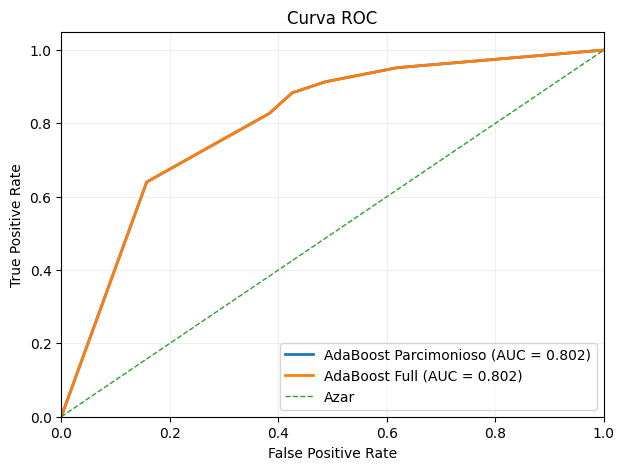

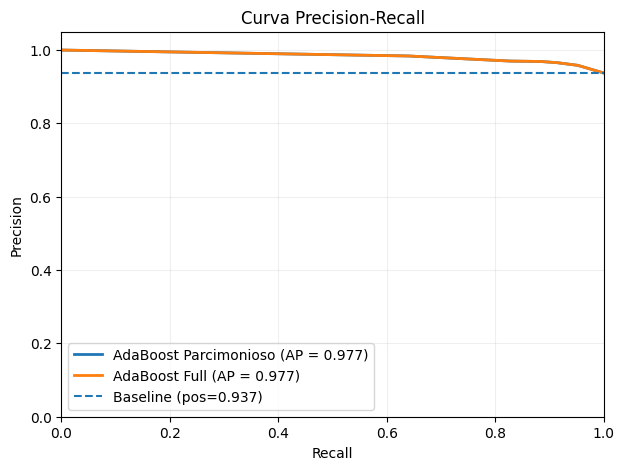

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Asegúrate de tener las probabilidades ya calculadas:
# y_proba_parc = ada_parc.predict_proba(X_test_scaled_parc)[:, 1]
# y_proba_full = ada_full.predict_proba(X_test_scaled_full)[:, 1]
# y_test_rf     = y_test_rf  # vector 0/1

# ===== Curva ROC =====
fpr_parc, tpr_parc, _ = roc_curve(y_test_rf, y_proba_parc)
fpr_full, tpr_full, _ = roc_curve(y_test_rf, y_proba_full)
auc_parc = auc(fpr_parc, tpr_parc)
auc_full = auc(fpr_full, tpr_full)

plt.figure(figsize=(7,5))
plt.plot(fpr_parc, tpr_parc, lw=2, label=f"AdaBoost Parcimonioso (AUC = {auc_parc:.3f})")
plt.plot(fpr_full, tpr_full, lw=2, label=f"AdaBoost Full (AUC = {auc_full:.3f})")
plt.plot([0,1], [0,1], lw=1, linestyle="--", label="Azar")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

# ===== (Opcional) Curva Precision-Recall =====
prec_parc, rec_parc, _ = precision_recall_curve(y_test_rf, y_proba_parc)
prec_full, rec_full, _ = precision_recall_curve(y_test_rf, y_proba_full)
ap_parc  = average_precision_score(y_test_rf, y_proba_parc)
ap_full  = average_precision_score(y_test_rf, y_proba_full)

plt.figure(figsize=(7,5))
plt.plot(rec_parc, prec_parc, lw=2, label=f"AdaBoost Parcimonioso (AP = {ap_parc:.3f})")
plt.plot(rec_full, prec_full, lw=2, label=f"AdaBoost Full (AP = {ap_full:.3f})")
# Línea base PR = proporción de la clase positiva
baseline = (y_test_rf.sum() / len(y_test_rf))
plt.hlines(baseline, 0, 1, linestyles="--", label=f"Baseline (pos={baseline:.3f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")
plt.grid(alpha=0.2)
plt.show()


In [ ]:
# Tomar la mitad superior según Avg_Rank
half_n = len(selected_columns) // 2

selected_half = (
    final_features.sort_values('Avg_Rank')  # menor rank = más importante
    .head(half_n)['Feature']
    .tolist()
)

print("Variables elegidas para el modelo reducido:")
print(selected_half)

# Escalar estas columnas en train
scaler_half = StandardScaler()
X_train_scaled_half = pd.DataFrame(
    scaler_half.fit_transform(X_train_rf[selected_half]),
    columns=selected_half,
    index=X_train_rf.index
)

# Entrenar AdaBoost reducido
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)

ada_half = AdaBoostClassifier(
    estimator=base,
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_half.fit(X_train_scaled_half, y_train_rf)

# Preparar test
X_test_scaled_half = pd.DataFrame(
    scaler_half.transform(X_test_rf[selected_half]),
    columns=selected_half,
    index=X_test_rf.index
)

# Predicciones
y_pred_half  = ada_half.predict(X_test_scaled_half)
y_proba_half = ada_half.predict_proba(X_test_scaled_half)[:, 1]


Variables elegidas para el modelo reducido:
['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index', 'age_in_years', 'severity_late_index', 'application_underwriting_score', 'late_payment_flag', 'no_of_premiums_paid', 'total_late_payments']


In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
import pandas as pd

def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    print(f"\n===== {nombre} =====")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"ROC AUC  : {roc_auc_score(y_true, y_proba):.4f}")

# --- Predecir y evaluar ---

# Parcimonioso
X_test_scaled_parc = pd.DataFrame(
    scaler_parc.transform(X_test_rf[selected_columns]),
    columns=selected_columns, index=X_test_rf.index
)
y_pred_parc  = ada_parc.predict(X_test_scaled_parc)
y_proba_parc = ada_parc.predict_proba(X_test_scaled_parc)[:, 1]
evaluar_modelo("AdaBoost Parcimonioso", y_test_rf, y_pred_parc, y_proba_parc)

# Half (mitad de variables)
X_test_scaled_half = pd.DataFrame(
    scaler_half.transform(X_test_rf[selected_half]),
    columns=selected_half, index=X_test_rf.index
)
y_pred_half  = ada_half.predict(X_test_scaled_half)
y_proba_half = ada_half.predict_proba(X_test_scaled_half)[:, 1]
evaluar_modelo("AdaBoost Half", y_test_rf, y_pred_half, y_proba_half)

# Full
X_test_scaled_full = pd.DataFrame(
    scaler_full.transform(X_test_rf),
    columns=X_test_rf.columns, index=X_test_rf.index
)
y_pred_full  = ada_full.predict(X_test_scaled_full)
y_proba_full = ada_full.predict_proba(X_test_scaled_full)[:, 1]
evaluar_modelo("AdaBoost Full", y_test_rf, y_pred_full, y_proba_full)

# --- Comparativa en tabla ---
resultados = pd.DataFrame([
    {
        "Modelo": "AdaBoost Parcimonioso",
        "Accuracy": accuracy_score(y_test_rf, y_pred_parc),
        "Precision": precision_score(y_test_rf, y_pred_parc, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_parc, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_parc, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_parc)
    },
    {
        "Modelo": "AdaBoost Half",
        "Accuracy": accuracy_score(y_test_rf, y_pred_half),
        "Precision": precision_score(y_test_rf, y_pred_half, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_half, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_half, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_half)
    },
    {
        "Modelo": "AdaBoost Full",
        "Accuracy": accuracy_score(y_test_rf, y_pred_full),
        "Precision": precision_score(y_test_rf, y_pred_full, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_full, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_full, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_full)
    }
])

print("\n=== Comparativa Métricas ===")
print(resultados.sort_values("ROC AUC", ascending=False))



===== AdaBoost Parcimonioso =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

===== AdaBoost Half =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

===== AdaBoost Full =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

=== Comparativa Métricas ===
                  Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  AdaBoost Parcimonioso  0.864042   0.968842  0.883377  0.924138  0.802335
1          AdaBoost Half  0.864042   0.968842  0.883377  0.924138  0.802335
2          AdaBoost Full  0.864042   0.968842  0.883377  0.924138  0.802335


In [ ]:
# 1️⃣ Seleccionar las primeras 5 variables
selected_top5 = selected_columns[:5]
print("Variables seleccionadas (Top 5):", selected_top5)

# 2️⃣ Escalar train con solo esas columnas
scaler_top5 = StandardScaler()
X_train_scaled_top5 = pd.DataFrame(
    scaler_top5.fit_transform(X_train_rf[selected_top5]),
    columns=selected_top5,
    index=X_train_rf.index
)

# 3️⃣ Entrenar AdaBoost con top 5 variables
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)

ada_top5 = AdaBoostClassifier(
    estimator=base,
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_top5.fit(X_train_scaled_top5, y_train_rf)

# 4️⃣ Preparar test
X_test_scaled_top5 = pd.DataFrame(
    scaler_top5.transform(X_test_rf[selected_top5]),
    columns=selected_top5,
    index=X_test_rf.index
)

# 5️⃣ Predecir
y_pred_top5  = ada_top5.predict(X_test_scaled_top5)
y_proba_top5 = ada_top5.predict_proba(X_test_scaled_top5)[:, 1]

# 6️⃣ Evaluar con la misma función que ya tienes
evaluar_modelo("AdaBoost Top 5", y_test_rf, y_pred_top5, y_proba_top5)

# 7️⃣ Agregar a tabla comparativa
resultados = pd.concat([
    resultados,
    pd.DataFrame([{
        "Modelo": "AdaBoost Top 5",
        "Accuracy": accuracy_score(y_test_rf, y_pred_top5),
        "Precision": precision_score(y_test_rf, y_pred_top5, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_top5, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_top5, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_top5)
    }])
], ignore_index=True)

print("\n=== Comparativa Métricas ===")
print(resultados.sort_values("ROC AUC", ascending=False))


Variables seleccionadas (Top 5): ['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index', 'age_in_years', 'severity_late_index']

===== AdaBoost Top 5 =====
Matriz de confusión:
[[  861   638]
 [ 2619 19838]]
Accuracy : 0.8640
Precision: 0.9688
Recall   : 0.8834
F1-score : 0.9241
ROC AUC  : 0.8023

=== Comparativa Métricas ===
                  Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  AdaBoost Parcimonioso  0.864042   0.968842  0.883377  0.924138  0.802335
1          AdaBoost Half  0.864042   0.968842  0.883377  0.924138  0.802335
2          AdaBoost Full  0.864042   0.968842  0.883377  0.924138  0.802335
3         AdaBoost Top 5  0.864042   0.968842  0.883377  0.924138  0.802335


In [ ]:
# 1️⃣ Tomar las 2 primeras variables
selected_top2 = selected_columns[:2]
print("Variables seleccionadas (Top 2):", selected_top2)

# 2️⃣ Escalar train
scaler_top2 = StandardScaler()
X_train_scaled_top2 = pd.DataFrame(
    scaler_top2.fit_transform(X_train_rf[selected_top2]),
    columns=selected_top2,
    index=X_train_rf.index
)

# 3️⃣ Entrenar AdaBoost con top 2 variables
base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)
ada_top2 = AdaBoostClassifier(
    estimator=base,
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_top2.fit(X_train_scaled_top2, y_train_rf)

# 4️⃣ Preparar test
X_test_scaled_top2 = pd.DataFrame(
    scaler_top2.transform(X_test_rf[selected_top2]),
    columns=selected_top2,
    index=X_test_rf.index
)

# 5️⃣ Predecir
y_pred_top2  = ada_top2.predict(X_test_scaled_top2)
y_proba_top2 = ada_top2.predict_proba(X_test_scaled_top2)[:, 1]

# 6️⃣ Evaluar
evaluar_modelo("AdaBoost Top 2", y_test_rf, y_pred_top2, y_proba_top2)

# 7️⃣ Comparar en tabla
resultados = pd.concat([
    resultados,
    pd.DataFrame([{
        "Modelo": "AdaBoost Top 2",
        "Accuracy": accuracy_score(y_test_rf, y_pred_top2),
        "Precision": precision_score(y_test_rf, y_pred_top2, zero_division=0),
        "Recall": recall_score(y_test_rf, y_pred_top2, zero_division=0),
        "F1": f1_score(y_test_rf, y_pred_top2, zero_division=0),
        "ROC AUC": roc_auc_score(y_test_rf, y_proba_top2)
    }])
], ignore_index=True)

print("\n=== Comparativa Métricas ===")
print(resultados.sort_values("ROC AUC", ascending=False))


Variables seleccionadas (Top 2): ['perc_premium_paid_by_cash_credit', 'age_in_days']

===== AdaBoost Top 2 =====
Matriz de confusión:
[[ 1005   494]
 [ 5995 16462]]
Accuracy : 0.7291
Precision: 0.9709
Recall   : 0.7330
F1-score : 0.8354
ROC AUC  : 0.7400

=== Comparativa Métricas ===
                  Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  AdaBoost Parcimonioso  0.864042   0.968842  0.883377  0.924138  0.802335
1          AdaBoost Half  0.864042   0.968842  0.883377  0.924138  0.802335
2          AdaBoost Full  0.864042   0.968842  0.883377  0.924138  0.802335
3         AdaBoost Top 5  0.864042   0.968842  0.883377  0.924138  0.802335
4         AdaBoost Top 2  0.729128   0.970866  0.733045  0.835359  0.739951


In [ ]:
# Función para entrenar, predecir y agregar métricas
def probar_top_n(n, resultados):
    selected_topn = selected_columns[:n]
    print(f"\nVariables seleccionadas (Top {n}):", selected_topn)

    # Escalar train
    scaler_topn = StandardScaler()
    X_train_scaled_topn = pd.DataFrame(
        scaler_topn.fit_transform(X_train_rf[selected_topn]),
        columns=selected_topn,
        index=X_train_rf.index
    )

    # Entrenar AdaBoost
    base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)
    ada_topn = AdaBoostClassifier(
        estimator=base,
        n_estimators=200,
        learning_rate=0.3,
        random_state=42
    )
    ada_topn.fit(X_train_scaled_topn, y_train_rf)

    # Preparar test
    X_test_scaled_topn = pd.DataFrame(
        scaler_topn.transform(X_test_rf[selected_topn]),
        columns=selected_topn,
        index=X_test_rf.index
    )

    # Predecir
    y_pred_topn  = ada_topn.predict(X_test_scaled_topn)
    y_proba_topn = ada_topn.predict_proba(X_test_scaled_topn)[:, 1]

    # Evaluar
    evaluar_modelo(f"AdaBoost Top {n}", y_test_rf, y_pred_topn, y_proba_topn)

    # Agregar a tabla de resultados
    resultados = pd.concat([
        resultados,
        pd.DataFrame([{
            "Modelo": f"AdaBoost Top {n}",
            "Accuracy": accuracy_score(y_test_rf, y_pred_topn),
            "Precision": precision_score(y_test_rf, y_pred_topn, zero_division=0),
            "Recall": recall_score(y_test_rf, y_pred_topn, zero_division=0),
            "F1": f1_score(y_test_rf, y_pred_topn, zero_division=0),
            "ROC AUC": roc_auc_score(y_test_rf, y_proba_topn)
        }])
    ], ignore_index=True)

    return resultados

# Probar con Top 3 y Top 4
resultados = probar_top_n(3, resultados)
resultados = probar_top_n(4, resultados)

# Mostrar tabla final
print("\n=== Comparativa Métricas ===")
print(resultados.sort_values("ROC AUC", ascending=False))



Variables seleccionadas (Top 3): ['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index']

===== AdaBoost Top 3 =====
Matriz de confusión:
[[  701   798]
 [ 1826 20631]]
Accuracy : 0.8905
Precision: 0.9628
Recall   : 0.9187
F1-score : 0.9402
ROC AUC  : 0.7899

Variables seleccionadas (Top 4): ['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index', 'age_in_years']

===== AdaBoost Top 4 =====
Matriz de confusión:
[[  701   798]
 [ 1826 20631]]
Accuracy : 0.8905
Precision: 0.9628
Recall   : 0.9187
F1-score : 0.9402
ROC AUC  : 0.7899

=== Comparativa Métricas ===
                  Modelo  Accuracy  Precision    Recall        F1   ROC AUC
0  AdaBoost Parcimonioso  0.864042   0.968842  0.883377  0.924138  0.802335
1          AdaBoost Half  0.864042   0.968842  0.883377  0.924138  0.802335
2          AdaBoost Full  0.864042   0.968842  0.883377  0.924138  0.802335
3         AdaBoost Top 5  0.864042   0.968842  0.883377  0.924138  0.802335
5         

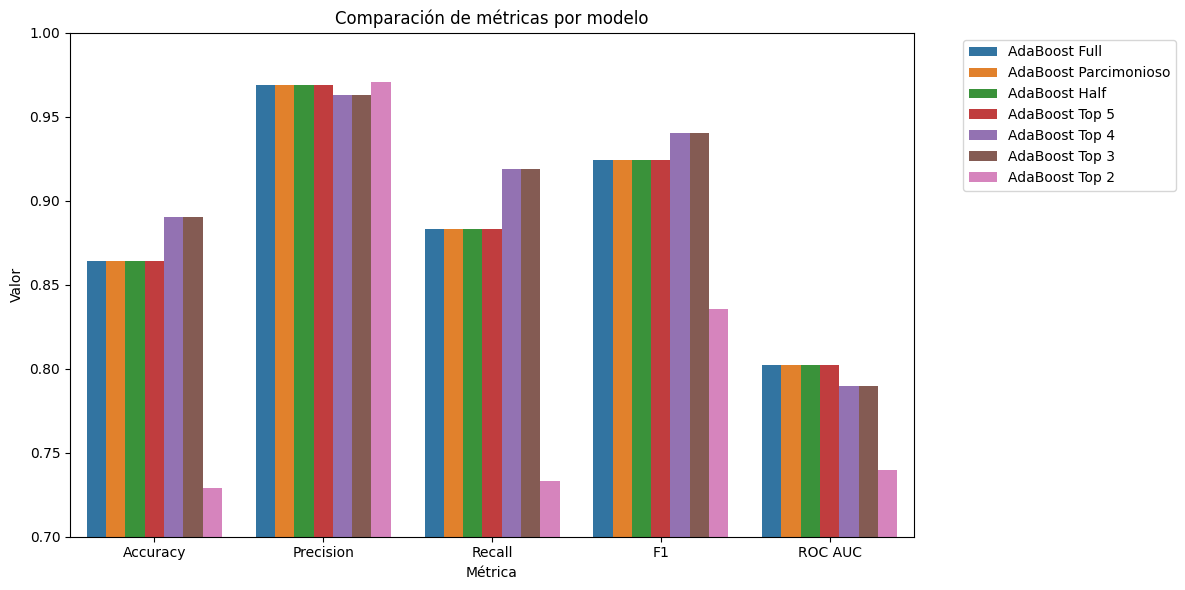

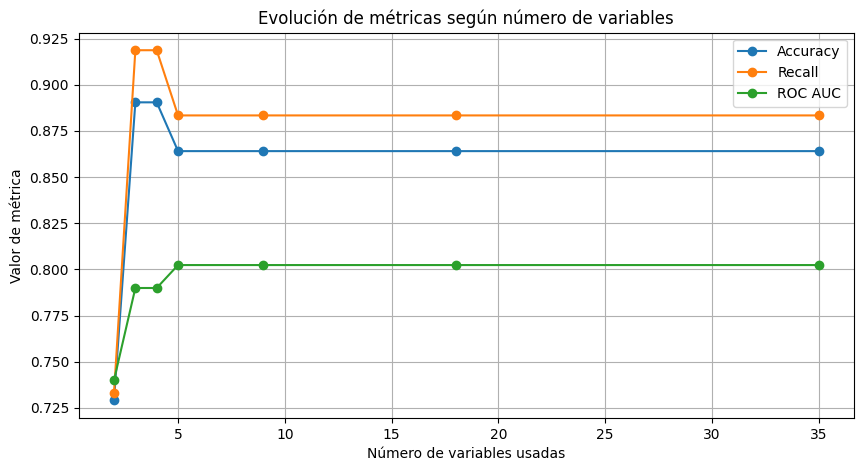

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que los modelos salgan en orden lógico
orden_modelos = [
    "AdaBoost Full",
    "AdaBoost Parcimonioso",
    "AdaBoost Half",
    "AdaBoost Top 5",
    "AdaBoost Top 4",
    "AdaBoost Top 3",
    "AdaBoost Top 2"
]

resultados_plot = resultados.copy()
resultados_plot['Modelo'] = pd.Categorical(resultados_plot['Modelo'], categories=orden_modelos, ordered=True)
resultados_plot = resultados_plot.sort_values('Modelo')

# 1️⃣ Barras comparativas de métricas
metricas = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]

plt.figure(figsize=(12,6))
resultados_melt = resultados_plot.melt(id_vars="Modelo", value_vars=metricas, var_name="Métrica", value_name="Valor")
sns.barplot(data=resultados_melt, x="Métrica", y="Valor", hue="Modelo")
plt.title("Comparación de métricas por modelo")
plt.ylim(0.7, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2️⃣ Evolución de métricas según número de variables (solo modelos Top + Full/Parc/Half)
# Extraer número de variables desde el nombre del modelo
def extraer_n_variables(nombre):
    if "Top" in nombre:
        return int(nombre.split()[-1])
    elif nombre == "AdaBoost Full":
        return X_train_rf.shape[1]
    elif nombre == "AdaBoost Parcimonioso":
        return len(selected_columns)
    elif nombre == "AdaBoost Half":
        return len(selected_columns) // 2
    else:
        return None

resultados_plot['N_variables'] = resultados_plot['Modelo'].apply(extraer_n_variables)

plt.figure(figsize=(10,5))
for metrica in ["Accuracy", "Recall", "ROC AUC"]:
    plt.plot(resultados_plot['N_variables'], resultados_plot[metrica], marker='o', label=metrica)

plt.xlabel("Número de variables usadas")
plt.ylabel("Valor de métrica")
plt.title("Evolución de métricas según número de variables")
plt.legend()
plt.grid(True)
plt.show()

---
##**9.- Entrene y valide con la información proporcionada un algoritmo de Machine Learning para solucionar la problemática planteada.**

In [ ]:
# 1️⃣ Seleccionar las 3 primeras variables
selected_top3 = selected_columns[:3]
print("Variables seleccionadas (Top 3):", selected_top3)

# 2️⃣ Escalar train con solo esas columnas
scaler_top3 = StandardScaler()
X_train_scaled_top3 = pd.DataFrame(
    scaler_top3.fit_transform(X_train_rf[selected_top3]),
    columns=selected_top3,
    index=X_train_rf.index
)

# 3️⃣ Entrenar AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base = DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, class_weight='balanced', random_state=42)

ada_top3 = AdaBoostClassifier(
    estimator=base,
    n_estimators=200,
    learning_rate=0.3,
    random_state=42
)
ada_top3.fit(X_train_scaled_top3, y_train_rf)

# 4️⃣ Preparar test
X_test_scaled_top3 = pd.DataFrame(
    scaler_top3.transform(X_test_rf[selected_top3]),
    columns=selected_top3,
    index=X_test_rf.index
)

# 5️⃣ Predecir sobre test
y_pred_top3  = ada_top3.predict(X_test_scaled_top3)
y_proba_top3 = ada_top3.predict_proba(X_test_scaled_top3)[:, 1]

# 6️⃣ Evaluar
evaluar_modelo("AdaBoost Top 3", y_test_rf, y_pred_top3, y_proba_top3)


Variables seleccionadas (Top 3): ['perc_premium_paid_by_cash_credit', 'age_in_days', 'cash_credit_late_index']

===== AdaBoost Top 3 =====
Matriz de confusión:
[[  701   798]
 [ 1826 20631]]
Accuracy : 0.8905
Precision: 0.9628
Recall   : 0.9187
F1-score : 0.9402
ROC AUC  : 0.7899


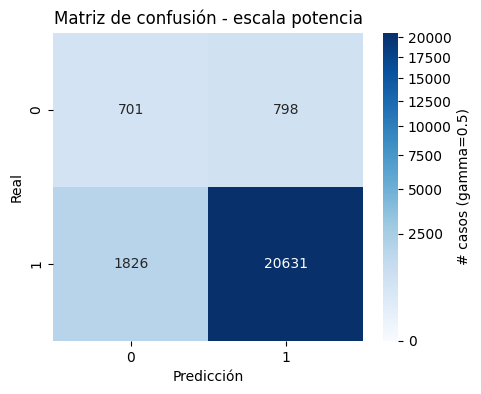

In [ ]:
from matplotlib.colors import PowerNorm
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt="d",
    cmap="Blues",
    norm=PowerNorm(gamma=0.5, vmin=0, vmax=cm.max()),
    cbar_kws={"label": "# casos (gamma=0.5)"}
)
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.title("Matriz de confusión - escala potencia")
plt.show()


---
##**10.- Cuáles son sus principales recomendaciones o hallazgos en la aplicación del laboratorio.**

# Recomendaciones y Hallazgos del Laboratorio

## 1. Balance de Clases

-   La matriz de confusión muestra un claro **desbalance de clases**:
    existe un número significativamente mayor de positivos
    (renovaciones) frente a negativos.
-   Este desbalance influye en las métricas, especialmente en la
    **precisión**, que se mantiene alta incluso con diferentes
    cantidades de variables.

## 2. Selección de Variables

-   Probar modelos con diferentes cantidades de variables reveló que
    **usar todas las variables no necesariamente mejora el
    rendimiento**.
-   El modelo **AdaBoost con Top 3 y Top 4 variables** superó en
    *Accuracy* y *F1-score* a las configuraciones con más variables,
    mostrando que un conjunto reducido de características relevantes
    puede ser más eficiente y preciso.

## 3. Interpretación de Métricas

-   Las métricas de *Accuracy*, *Precision*, *Recall*, y *F1* se
    mantuvieron muy similares para la mayoría de configuraciones,
    excepto cuando se redujo a 2 variables, donde hubo una caída
    significativa en el rendimiento.
-   El **ROC AUC** confirma el mejor balance entre verdaderos positivos
    y negativos en los modelos con Top 3 y Top 4 variables.

## 4. Impacto en Negocio

-   Con menos variables y similar rendimiento, el modelo es **más
    interpretable** y **más fácil de mantener**, lo que facilita su
    implementación en entornos productivos.
-   Usar variables clave también reduce el riesgo de sobreajuste y
    permite tomar decisiones más rápidas.

## 5. Visualización y Diagnóstico

-   El uso de **matrices de confusión con escala logarítmica** o
    normalizadas por fila mejora la interpretación en casos de
    desbalance.
-   Esto permite identificar patrones de error (falsos negativos y
    falsos positivos) que no serían evidentes en la escala original.

------------------------------------------------------------------------

**Conclusión:**\
El análisis respalda la recomendación de **implementar un modelo
AdaBoost con las 3 o 4 variables más relevantes**, logrando un buen
equilibrio entre simplicidad, interpretabilidad y rendimiento
predictivo.
